# Rejection Sampling Methods

The Rejection-Sampling techniques finds samples from a distribution $p({\bf z})$ for which direct sampling is difficult. To find samples from $p({\bf z})$, we consider a simpler *proposal distribution* $q({\bf z})$ such that sampling is easy.

Assume that evaluation of $p({\bf z})$ is easily done up to a normalization constant $Z_p$ such that

$$
    p({\bf z}) = \frac{1}{Z_p} \tilde p({\bf z})
$$

Next, consider $k\in\mathbb{R}^{+}$ such that $\forall z. kq({\bf z}) \geq \tilde p({\bf z})$; $kq({\bf z})$ is called the comparisson function.

The rejection sampling method works as follows:

1. Generate a number ${\bf z}_0$ from the distribution $q({\bf z})$
2. Generate a number $u_0$ from the distribution $\text{U}\big(0, kq({\bf z}_0)\big)$
3. If $u_0 > \tilde p({\bf z}_0)$ then ${\bf z}_0$ is rejected, otherwise ${\bf z}_0$ is retained

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand, random_sample, seed
from scipy.stats import gamma, norm

In [2]:
from numpy.random import randn

In [3]:
%config InlineBackend.figure_format = "retina"

## Example (1):
We want to sample from a $\text{Gamma}(a, b)$ distribution via a $\mathcal{N}(a, c)$ distribution.

$$
    \text{Gam}(z|a,b) = \frac{b^a z^{a-1}\exp(-bz)}{\Gamma(a)}
$$

In [4]:
a, b = 10, 1
p = gamma(a=a, scale=b)

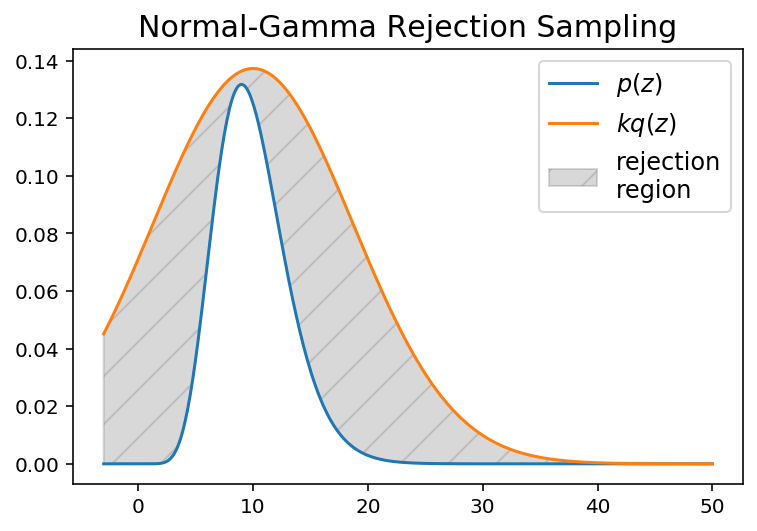

In [5]:
xrange = np.linspace(-3, 50, 500)

k = 3
c = np.sqrt(2 * a - 1)

p_density = p.pdf(xrange)
q = norm(loc=a, scale=2 * c)
qk_density = k * q.pdf(xrange)

plt.plot(xrange, p_density, label="$p(z)$")
plt.plot(xrange, qk_density, label="$kq(z)$");
plt.fill_between(xrange, p_density, qk_density,
                 color="tab:gray", alpha=0.3, hatch="/",
                 label="rejection\nregion")
plt.legend(fontsize=12)
plt.title("Normal-Gamma Rejection Sampling", fontsize=15);

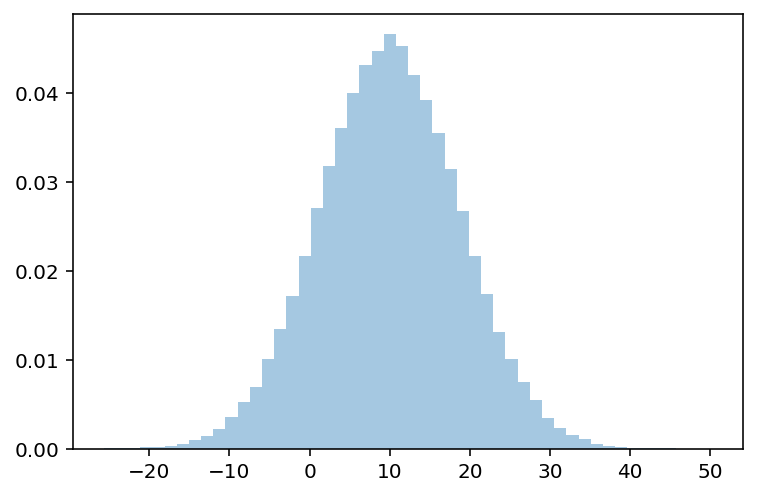

In [6]:
y_rvs = randn(100_000)
z_rvs = y_rvs * 2 * c + a
sns.distplot(z_rvs, kde=False, norm_hist=True);

In [7]:
N = len(z_rvs)
u = random_sample(N) * k * q.pdf(z_rvs)
gamma_samples = z_rvs[u <= p.pdf(z_rvs)]

In [8]:
# proportion of accepted samples
len(gamma_samples) / N

0.33364

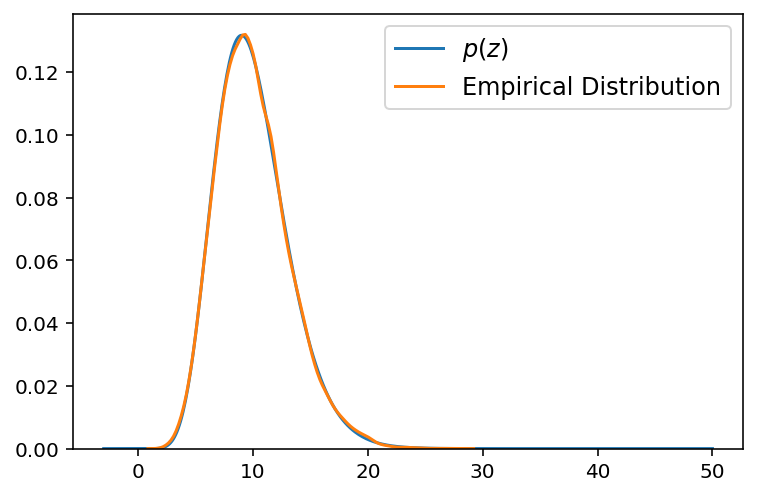

In [9]:
plt.plot(xrange, p_density, label="$p(z)$")
sns.kdeplot(gamma_samples, label="Empirical Distribution")
plt.legend(fontsize=12)

## Example (2):

In this example we aim to sample for a distribution $p({\bf z})$ with unknown normalization constant $Z_p$.


Idea extracted from [here](https://www4.stat.ncsu.edu/~rmartin/OldCourses/Stat451/Notes/451notes05.pdf) and [here](https://www4.stat.ncsu.edu/~rmartin/OldCourses/Stat451/Codes/451code05.R)

In [10]:
def tilde_p(x):
    return (np.exp(-x ** 2 / 2) *
            (np.sin(6 * x) ** 2 + 
             3 * np.cos(x) ** 2 *
             np.sin(4 * x) ** 2 + 1))

q = norm(loc=0, scale=1)

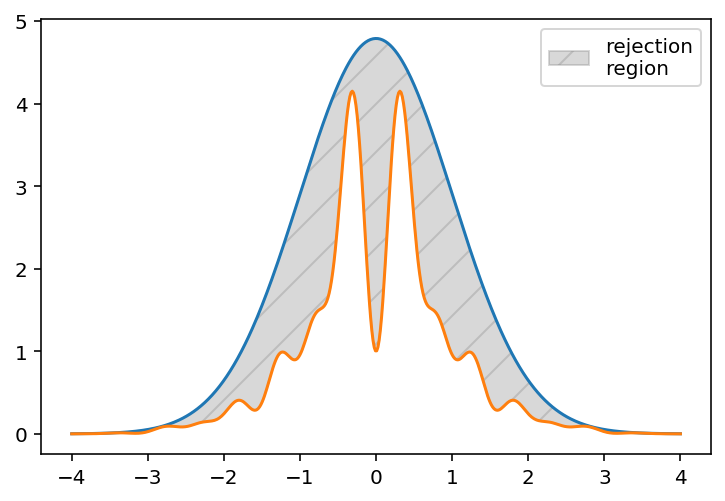

In [11]:
xrange = np.linspace(-4, 4, 500)
k = 12

plt.plot(xrange, k * q.pdf(xrange))
plt.plot(xrange, tilde_p(xrange))
plt.fill_between(xrange, tilde_p(xrange), k * q.pdf(xrange),
                 color="tab:gray", alpha=0.3, hatch="/",
                 label="rejection\nregion")
plt.legend();

In [12]:
N = 1_000_000
z_rvs = randn(N)
N = len(z_rvs)
u = random_sample(N) * k * q.pdf(z_rvs)
casella_samples = z_rvs[u <= tilde_p(z_rvs)]

In [13]:
len(casella_samples) / N

0.491728

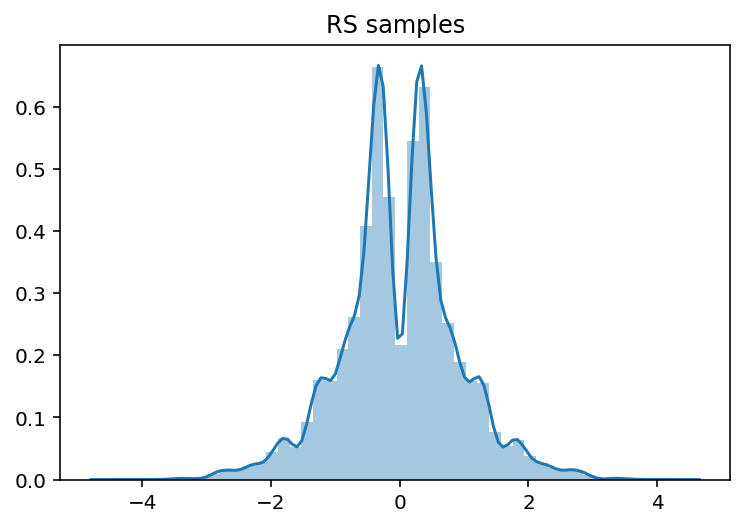

In [14]:
plt.title("RS samples")
sns.distplot(casella_samples);